In [1]:
import torch
import torchvision
import gc
import pandas as pd
import numpy as np
import time

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("", device, "device")


gc.collect()
torch.cuda.empty_cache()

 cuda device


In [2]:
# Generate result using pandas
n = 3
m = 0
my_list = []
while m < 31:
    my_list.append([])
    for i in range(1):
        matrix_size = (90+m)*(90+m)
        my_list[m].append(matrix_size/(90+m))
        x = torch.randn(matrix_size, matrix_size)
        y = torch.randn(matrix_size, matrix_size)

        start = time.time()
        result_tr = torch.matmul(x, y)
        my_list[m].append(time.time() - start)
        torch.cuda.synchronize()
        x_gpu = x.to(device)
        y_gpu = y.to(device)
        my_list.append([])
        for i in range(3):
            start = time.time()
            result_gpu = torch.matmul(x_gpu, y_gpu)
            torch.cuda.synchronize()
            my_list[m].append(time.time() - start)
    m = m + 1
    print(m)

gc.collect()
torch.cuda.empty_cache()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


<AxesSubplot: xlabel='LenMatrix'>

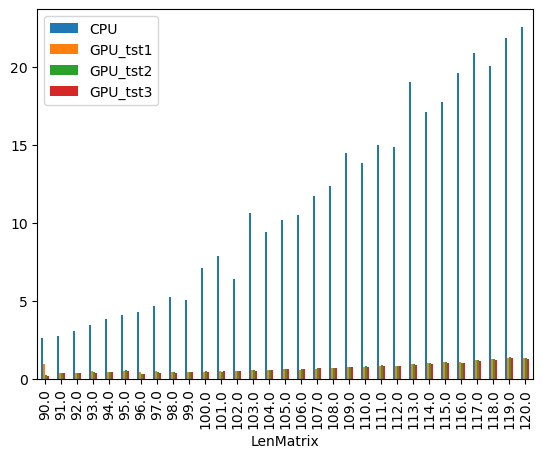

In [9]:
df = pd.DataFrame(my_list)
df.columns =['LenMatrix', 'CPU','GPU_tst1', 'GPU_tst2', 'GPU_tst3']
df
df.groupby('LenMatrix').sum().plot(kind='bar')